# __Time Series forecasting__

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sales-cars.csv')
df.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [3]:
type(df['Month'][0])

str

In [4]:
from datetime import datetime

In [14]:
def dateparser(string):
    return datetime.strptime(string, '%Y-%m')

In [16]:
df = pd.read_csv('sales-cars.csv', parse_dates=[0], date_parser=dateparser, index_col=[0])
df.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [17]:
df.tail()

,Sales
Month,
2018-08-01,408
2018-09-01,490
2018-10-01,420
2018-11-01,520
2018-12-01,480


The above method is a more efficient method to convert strings to date time compared to using a for loop and going record by record

<AxesSubplot:xlabel='Month'>

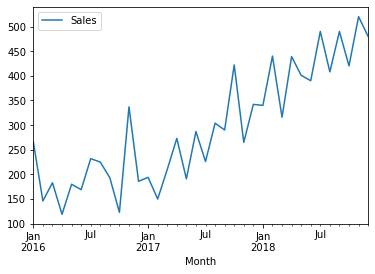

In [20]:
df.plot()

In [21]:
from statsmodels.graphics.tsaplots import plot_acf

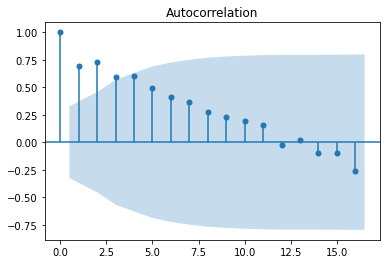

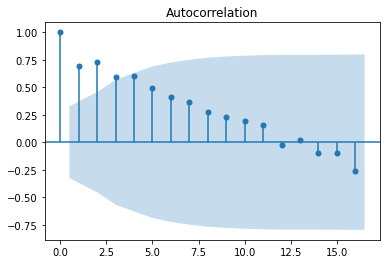

In [22]:
plot_acf(df)

### here we can see that the data is decreasing gradually which showcases that this data is clearly not stationary
### to make this data stationary we shall use difference

# AR model

In [23]:
df_diff = df.diff(periods=1)
df_diff.head()

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0


The first value is NaN as it has no value above it to get a difference

In [25]:
df_diff.dropna(inplace=True)
df_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


<AxesSubplot:xlabel='Month'>

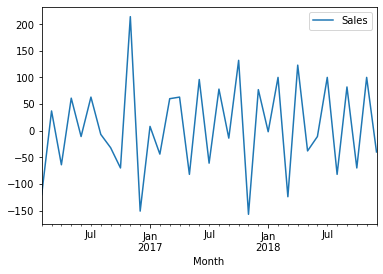

In [26]:
df_diff.plot()

# Now we can see that our data is more or less stationary as compared to previous data

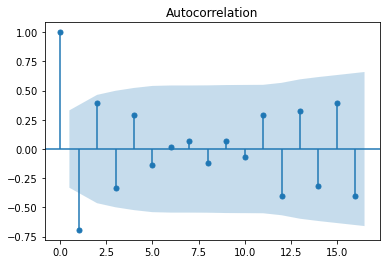

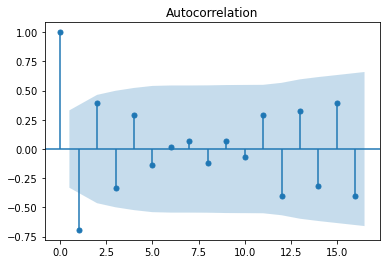

In [27]:
plot_acf(df_diff)

# if you check the autocorrelation plot then it does not have a gradual decrease but rather an abrupt decrease there by signifying that the data is now stationary

### in time series we do not perform train test split randomly 
### because that would break the series of periodic data
### so we manually split our data 
### since we need all of data in train and test has gotta be sequential

In [28]:
train = df_diff[:28]
test = df_diff[28:]

In [29]:
from statsmodels.tsa.ar_model import AR

model_ar = AR(train)

model_ar_fit = model_ar.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:\

### statsmodel works a little differently then sklearn see the above implementation

In [30]:
pred = model_ar_fit.predict(start=28, end=35)

In [31]:
import matplotlib.pyplot as plt

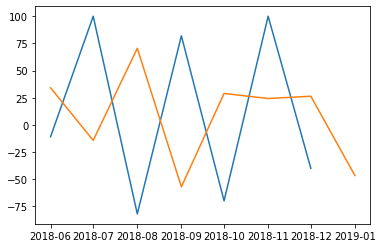

In [32]:
plt.plot(test)
plt.plot(pred)

In [55]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test, pred[0])

2468.9542204954487

In [54]:
from sklearn.metrics import r2_score

r2_score(test, pred[0])

-0.11813040080745485

# ARIMA model

In [38]:
from statsmodels.tsa.arima_model import ARIMA

In [39]:
train = df[:28]
test = df[28:]

In [40]:
df.shape

(36, 1)

In [41]:
model_arima = ARIMA(train, order=(1, 1, 1)) # order=(p,d,q) -> order(autoregvalue, integrated diff, lag)

model_arima_fit = model_arima.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [44]:
pred = model_arima_fit.forecast(steps=8)

In [48]:
pred

(array([371.4564308 , 412.27529031, 406.152285  , 420.36417527,
        425.76712751, 434.9860516 , 442.55192272, 450.83388511]),
 array([59.78471604, 60.14758337, 64.09960602, 64.82971805, 66.564676  ,
        67.7768048 , 69.16215898, 70.43593974]),
 array([[254.28054053, 488.63232106],
        [294.38819315, 530.16238748],
        [280.51936578, 531.78520421],
        [293.30026276, 547.42808778],
        [295.3027599 , 556.23149512],
        [302.14595521, 567.82614799],
        [306.99658203, 578.10726341],
        [312.78198001, 588.88579022]]))

In [52]:
r2_score(test, pred[0])

-0.11813040080745485

In [50]:
model_arima_fit.aic

306.85894261817134

In [51]:
mean_squared_error(test, pred[0])

2468.9542204954487

In [56]:
test.shape

(8, 1)

In [57]:
import numpy as np

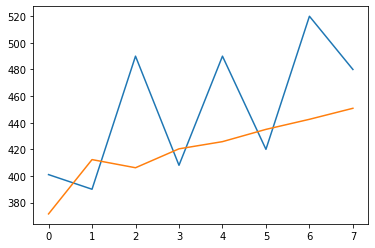

In [59]:
plt.plot(np.arange(0,8), test.Sales)
plt.plot(np.arange(0,8), pred[0])

## Typically one does not just guess the p, d and q value 
## now we need to automate that because we dont wanna use trial and error and make it labour intensive for no reason

In [60]:
import itertools

p = range(0,6)
d = range(0,6)
q = range(0,6)

pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2,

In [61]:
min_aic = 10000000
best_comb = ()

for comb in pdq:
    model_arima = ARIMA(train, order=comb)
    model_arima_fit = model_arima.fit()
    if model_arima_fit.aic < min_aic:
        best_comb = comb
        print(model_arima_fit.aic)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

335.08327681905075
334.36881258466883
329.3343588225476
330.93461778338576


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:222: RuntimeWarning: invalid value encountered in log
  loglike, sigma2 = kalman_loglike.kalman_loglike_complex(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:222: RuntimeWarning: invalid value encountered in true_divide
  loglike, sigma2 = kalman_loglike.kalman_loglike_complex(
C:\ProgramData\Anaconda3\lib\site-package

325.01231715110697
324.39820432750815
308.00821923897456
306.8574915861368
308.85219774078087
309.9156877851472
308.6252777362763
343.4127008785868
318.2411236635377
300.55770808177886
303.1374589327437


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

## this may throw error as well so gotta use exception handling

In [62]:
import warnings 
warnings.filterwarnings('ignore')
min_aic = 10000000
best_comb = ()

for comb in pdq:
    try:
        model_arima = ARIMA(train, order=comb)
        model_arima_fit = model_arima.fit()
        if model_arima_fit.aic < min_aic:
            best_comb = comb
            print(model_arima_fit.aic)
    except:
        print('Got error at combination: ', comb)

335.08327681905075
334.36881258466883
329.3343588225476
330.93461778338576
325.01231715110697
324.39820432750815
308.00821923897456
306.8574915861368
308.85219774078087
309.9156877851472
308.6252777362763
343.4127008785868
318.2411236635377
300.55770808177886
303.1374589327437
Got error at combination:  (0, 2, 4)
Got error at combination:  (0, 2, 5)
Got error at combination:  (0, 3, 0)
Got error at combination:  (0, 3, 1)
Got error at combination:  (0, 3, 2)
Got error at combination:  (0, 3, 3)
Got error at combination:  (0, 3, 4)
Got error at combination:  (0, 3, 5)
Got error at combination:  (0, 4, 0)
Got error at combination:  (0, 4, 1)
Got error at combination:  (0, 4, 2)
Got error at combination:  (0, 4, 3)
Got error at combination:  (0, 4, 4)
Got error at combination:  (0, 4, 5)
Got error at combination:  (0, 5, 0)
Got error at combination:  (0, 5, 1)
Got error at combination:  (0, 5, 2)
Got error at combination:  (0, 5, 3)
Got error at combination:  (0, 5, 4)
Got error at combin

In [63]:
best_comb

(5, 2, 3)

### for our p d q combination to be at 5 2 3 we have the best combination

In [64]:
model_arima = ARIMA(train, order=(5,2,3))

model_arima_fit = model_arima.fit()

In [65]:
model_arima_fit.aic

308.5541167865688

In [66]:
pred = model_arima_fit.forecast(steps=8)

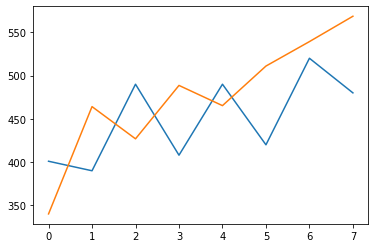

In [67]:
plt.plot(np.arange(0,8), test.Sales)
plt.plot(np.arange(0,8), pred[0])

## other models available for time series forecasting

1. FB prophet
2. LSTM implementation for time series forecasting
3. RNN implementation for time series forecasting